<a href="https://colab.research.google.com/github/BrunoAlexandreAmaral/modelo_clasificacao/blob/main/Arvore_Decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from google.colab import files
from sklearn import tree

In [4]:
uploaded = files.upload()

Saving golf_df.xlsx to golf_df.xlsx


In [5]:
df = pd.read_excel("golf_df.xlsx")

In [6]:
df.head()

,clima,temp,umidade,vento,jogar
0,sunny,hot,high,no,no
1,sunny,hot,high,yes,no
2,overcast,hot,high,no,yes
3,rainy,mild,high,no,yes
4,rainy,cool,normal,no,yes


In [10]:
x = pd.get_dummies(df[["clima","temp","umidade","vento"]])
y = df["jogar"]

In [19]:
x = pd.DataFrame(x)

In [22]:
x

,clima_overcast,clima_rainy,clima_sunny,temp_cool,temp_hot,temp_mild,umidade_high,umidade_normal,vento_no,vento_yes
0,False,False,True,False,True,False,True,False,True,False
1,False,False,True,False,True,False,True,False,False,True
2,True,False,False,False,True,False,True,False,True,False
3,False,True,False,False,False,True,True,False,True,False
4,False,True,False,True,False,False,False,True,True,False
5,False,True,False,True,False,False,False,True,False,True
6,True,False,False,True,False,False,False,True,False,True
7,False,False,True,False,False,True,True,False,True,False
8,False,False,True,True,False,False,False,True,True,False
9,False,True,False,False,False,True,False,True,True,False


In [27]:
x = x.astype({"clima_overcast":"int","clima_rainy":"int","clima_sunny":"int",	"temp_cool":"int",	"temp_hot":"int",	"temp_mild":"int",	"umidade_high":"int", "umidade_normal":"int",	"vento_no":"int",	"vento_yes":"int",})

In [29]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   clima_overcast  14 non-null     int64
 1   clima_rainy     14 non-null     int64
 2   clima_sunny     14 non-null     int64
 3   temp_cool       14 non-null     int64
 4   temp_hot        14 non-null     int64
 5   temp_mild       14 non-null     int64
 6   umidade_high    14 non-null     int64
 7   umidade_normal  14 non-null     int64
 8   vento_no        14 non-null     int64
 9   vento_yes       14 non-null     int64
dtypes: int64(10)
memory usage: 1.2 KB


In [45]:
model = tree.DecisionTreeClassifier()

In [46]:
model_treinado = model.fit(x,y)

In [48]:
y

,jogar
0,no
1,no
2,yes
3,yes
4,yes
5,no
6,yes
7,no
8,yes
9,yes


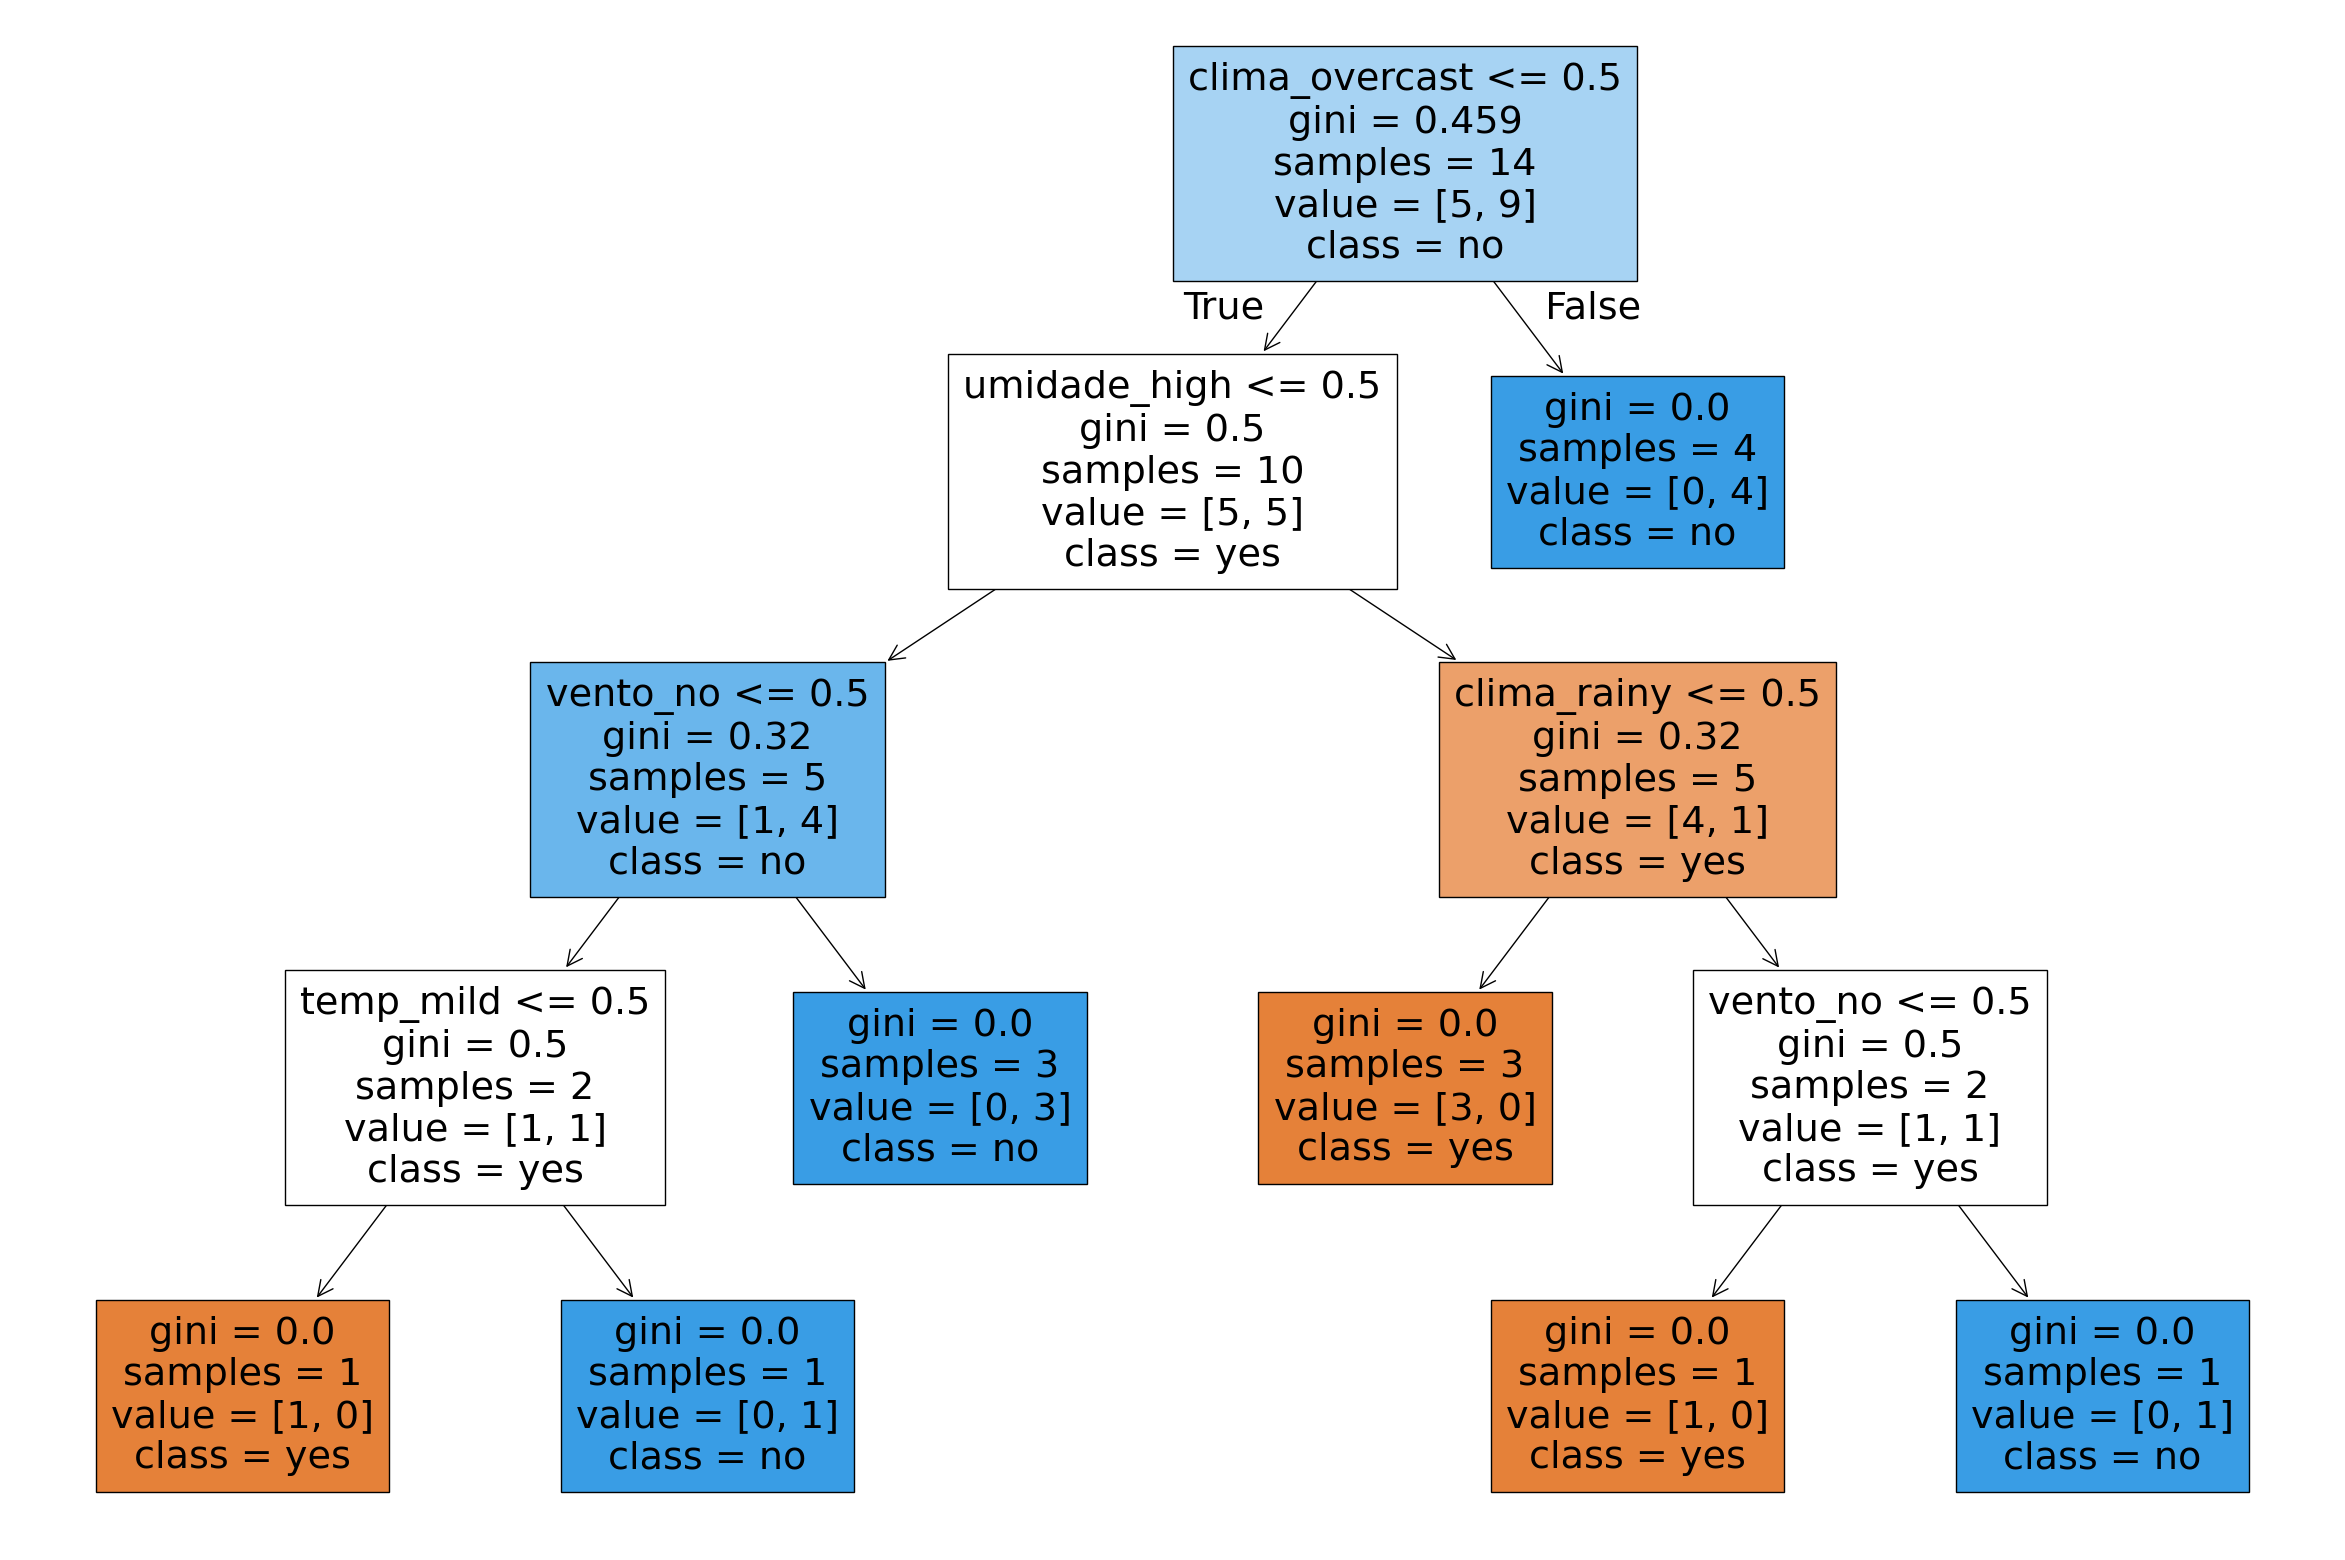

In [50]:
fig = plt.figure(figsize=(30,20))
fig = tree.plot_tree(model_treinado, feature_names=x.columns, class_names=["yes","no"], filled=True)